# AMZN
Amazon.com, Inc. has a market cap of $1.4 trillion and is a leading e-commerce and cloud computing company. It operates through three segments: North America, International, and Amazon Web Services (AWS). 

The company offers a wide range of products and services, including online retail, subscription services, and digital content. Amazon is known for its customer-centric approach, innovative technology, and extensive logistics network. 

The company has a strong presence in various markets, including retail, cloud computing, and digital streaming.

## Settings

In [1]:
# Root Settings
import sys
from pathlib import Path

# Add project root to path
sys.path.append(str(Path().resolve().parent))

# Load basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Custom functions using sec-edgar-api and yfinance
from finance import (
    get_facts,
    annual_net_income, plot_annual_net_income, plot_net_income_growth,
    annual_dividends, plot_annual_dividends, plot_dividends_growth,
    historical_price
)

# Style settings
plt.style.use('ggplot')
plt.rc('axes', unicode_minus=False)
plt.rcParams.update({
    'axes.titlesize': 20,       # Plot titles
    'axes.labelsize': 16,       # X/Y axis labels
    'xtick.labelsize': 14,      # X-axis tick labels
    'ytick.labelsize': 16,      # Y-axis tick labels
    'legend.fontsize': 12,      # Legend (if used)
    'figure.titlesize': 22,     # Main figure title (if used)
})

## Company Information

In [2]:
ticker = 'AMZN'
facts = get_facts(ticker=ticker)

## Income

Amazon has grown rapidly over last 5 years, and it includes the minus net income of 2022. 

Back in 2015 the company had a net income of $0.596 billion, which has grown to $59.2 billion in 2024. The net income has grown 100 times in 9 years, which is a 1000% growth.

In [11]:
df_net_income = annual_net_income(facts)
df_net_income[0].tail(10)

,date,net_income,year
8,2015-12-31,596000000,2015
9,2016-12-31,2371000000,2016
10,2017-12-31,3033000000,2017
11,2018-12-31,10073000000,2018
12,2019-12-31,11588000000,2019
13,2020-12-31,21331000000,2020
14,2021-12-31,33364000000,2021
15,2022-12-31,-2722000000,2022
16,2023-12-31,30425000000,2023
17,2024-12-31,59248000000,2024


## Income Growth (%)

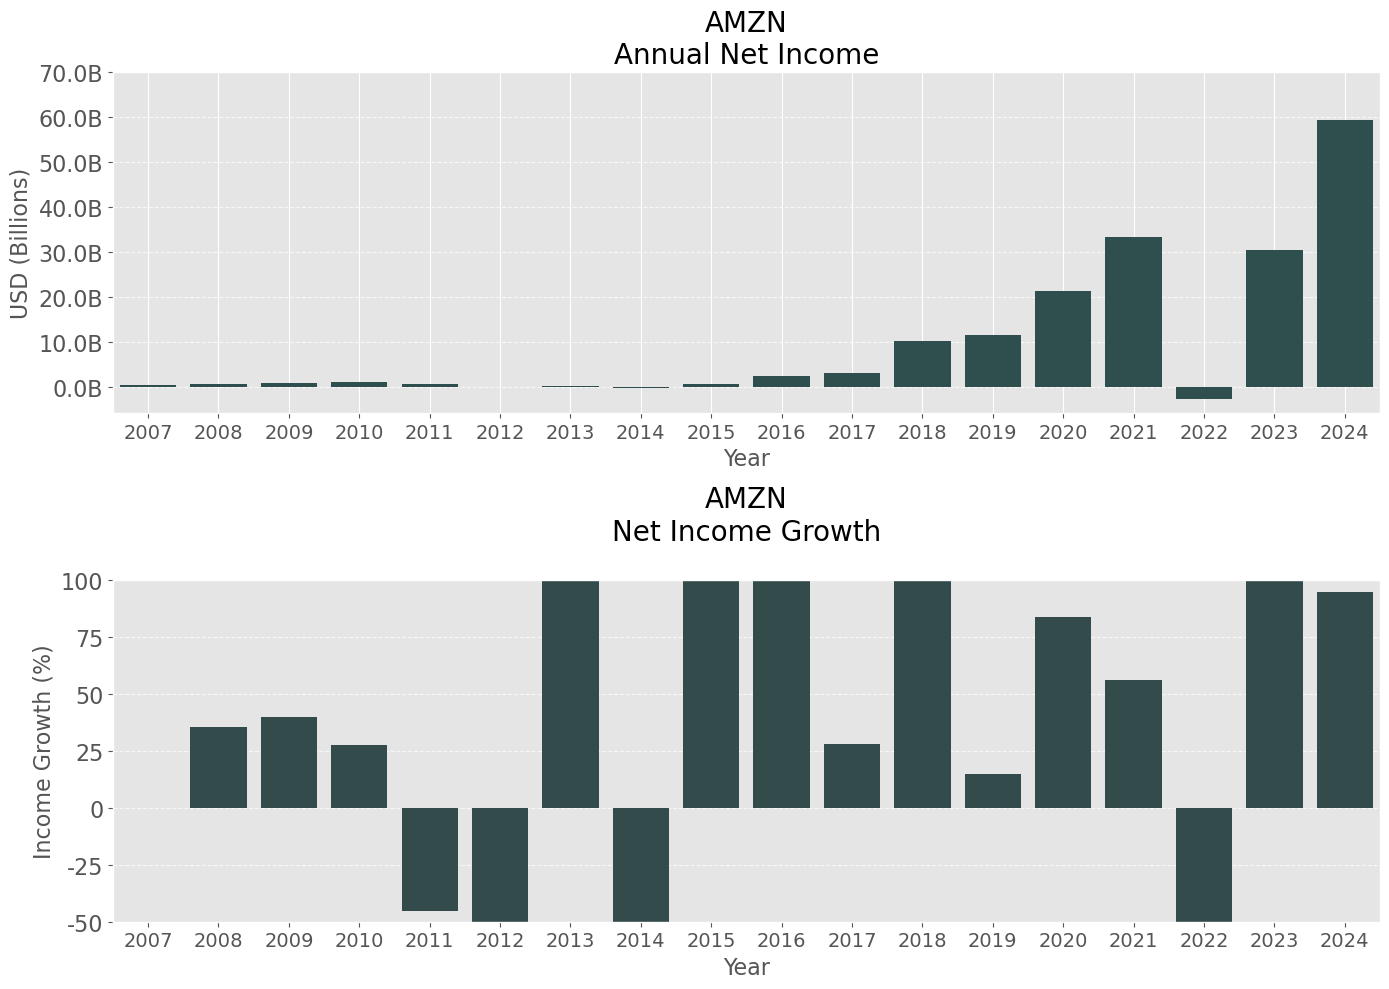

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_net_income(df_net_income[0], ticker=ticker, unit='B', ystep=100e8, ax=axes[0])
plot_net_income_growth(df_net_income[0], ticker=ticker, ymin=-50, ymax=100, ystep=25, ax=axes[1])

# ✅ Show x-ticks on upper graph too
axes[0].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

> Amazon reported a net loss of $2.7 billion in 2022, marking its first annual loss since 2014. This downturn was primarily due to a significant pre-tax valuation loss of $12.7 billion from its investment in Rivian Automotive, Inc., a manufacturer of electric vehicles. This loss was recorded under non-operating income (expense) and had a substantial impact on Amazon's overall profitability for the year .​
> 
> Despite generating $514 billion in revenue in 2022, Amazon's net loss underscores the importance of considering both operating and non-operating factors when evaluating a company's financial health.​
>
> **created by chatGPT**

## Price

The stock price has also grown rapidly over the years. It is very volatile, over $150 in 2022, but under 100 in 2023, and in 2024 it is almost $250.  

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


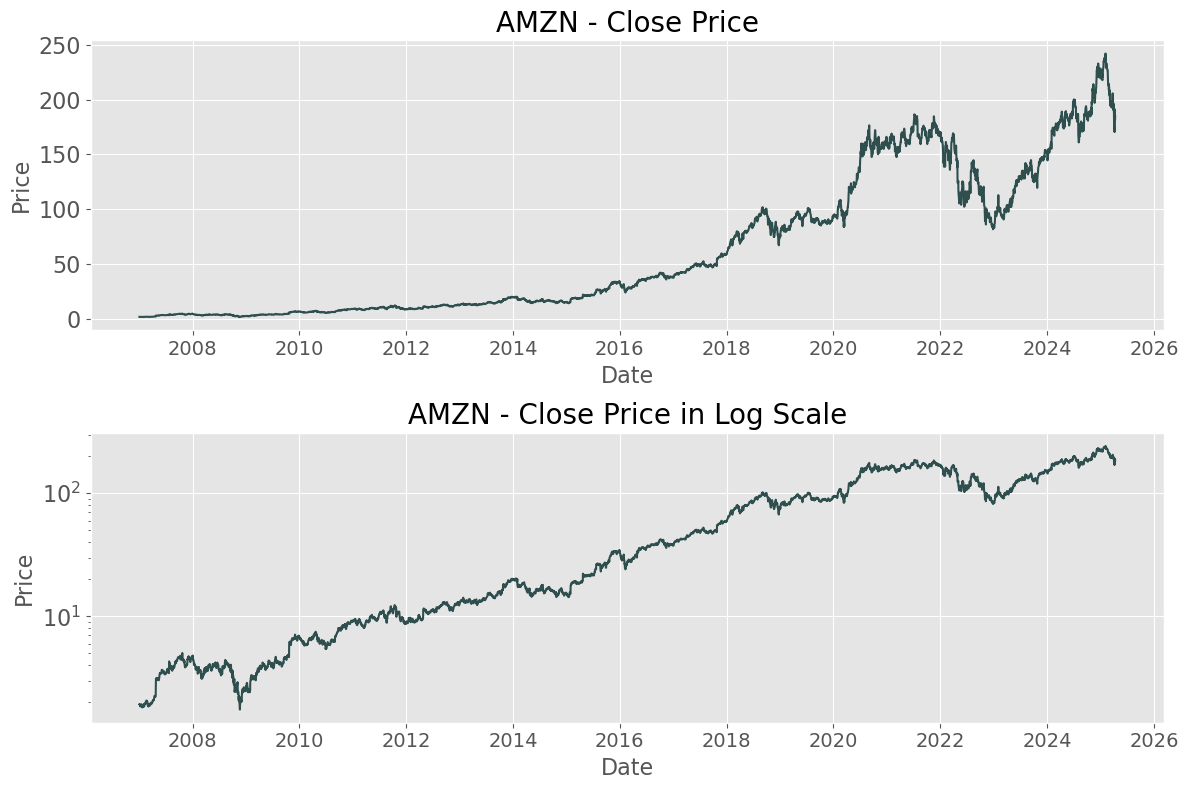

In [5]:
import matplotlib.pyplot as plt
from finance import historical_price

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

historical_price(ticker, start="2007", column="Close", scale='linear', ax=axes[0])
historical_price(ticker, start="2007", column="Close", scale='log', ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()


## Dividends

> *"Do you know the only thing that gives me pleasure? It's to see my dividends coming in."*  
> 
> *John D. Rockefeller, 1901*

In [6]:
from finance import annual_dividends

df_dividends = annual_dividends(facts)
df_dividends[0].tail(5)

""


In [ ]:
from finance import plot_annual_dividends, plot_dividends_growth

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_dividends(df_dividends[0], ticker=ticker, unit='B', ax=axes[0])
plot_dividends_growth(df_dividends[0], ticker=ticker, ymin=-10, ymax=10, ystep=5, ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

[AMZN] No dividend data available. Skipping annual dividend plot.
[AMZN] No dividend data available. Skipping dividends growth plot.


## P/E Ratio

It is impossible to calculate the P/E ratio if the company has a net loss. Therefore, the historical P/E ratio is somewhat strange but has shown a decline over the years.

In [8]:
price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share
pe = (market_cap.iloc[-1] / df_net_income[0].net_income.iloc[-1]).iloc[0]

print(f"Latest P/E Ratio for {ticker}: {pe:.2f}")

[*********************100%***********************]  1 of 1 completed


Latest P/E Ratio for AMZN: 33.11


[*********************100%***********************]  1 of 1 completed


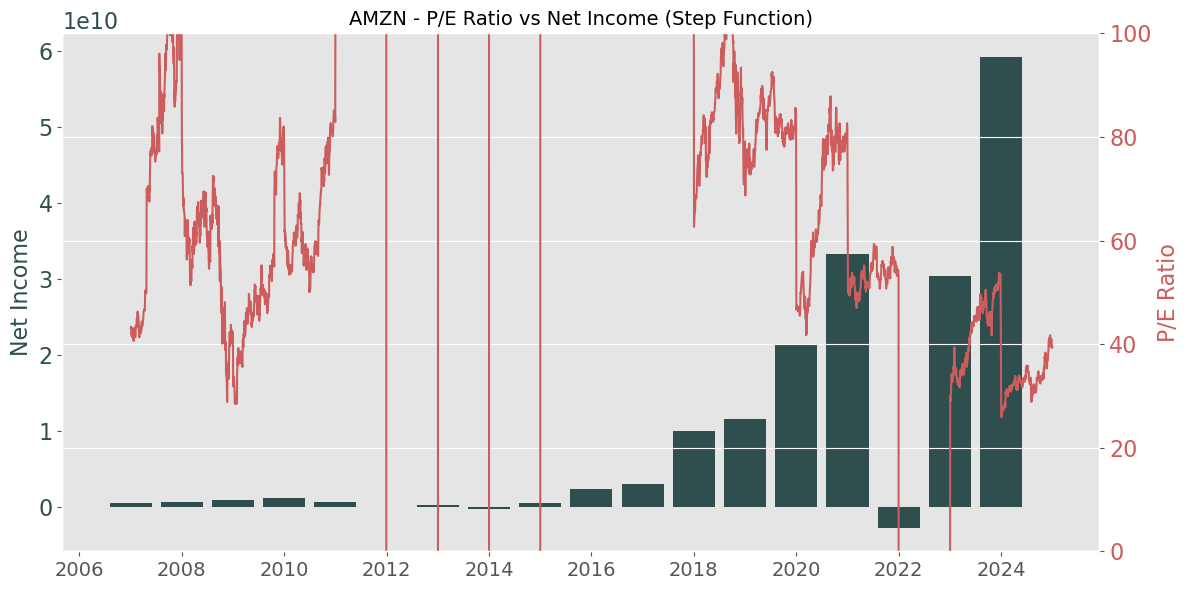

In [13]:
import yfinance as yf

price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share

df = df_net_income[0].copy()
df = df[df['year'] >= market_cap.index.min().year]
df['effective_date'] = pd.to_datetime(df['year'], format='%Y')  # Jan 1 of next year

# Daily P/E Ratio using step function for annual income
step_dates = pd.to_datetime(df['date'])
step_income = df.set_index('date')['net_income']

# Create step series aligned with price_df
pe_df = market_cap.copy()
pe_df['year'] = pe_df.index.year
pe_df['net_income'] = pe_df['year'].map(df.set_index('year')['net_income'])
pe_df['pe'] = pe_df[ticker] / pe_df['net_income']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Net Income (right y-axis)
ax1.bar(df['effective_date'], df['net_income'], width=300, color='darkslategray')
ax1.set_ylabel('Net Income', color='darkslategray')
ax1.tick_params(axis='y', labelcolor='darkslategray')
ax1.grid(False)

# P/E Ratio (left y-axis)
ax2 = ax1.twinx()
ax2.plot(pe_df.index, pe_df['pe'], color='indianred', label='P/E Ratio')
ax2.set_ylabel('P/E Ratio', color='indianred')
ax2.set_ylim(0, 100)
ax2.tick_params(axis='y', labelcolor='indianred')

# Title and x-label
plt.title(f'{ticker} - P/E Ratio vs Net Income (Step Function)', fontsize=14)
ax2.set_xlabel('Date')

plt.tight_layout()
plt.show()

## Conclusion

**HOLD**

Amazon may be a good company, but the stock price and the net income are very volatile. 

It has grown rapidly over the years, I have AMZN in my portfolio with pretty good results but still it's hard to predict the future. Willing to hold it more, but I am not sure if I will buy more.